# Analiza skupień cz 2.:
### Alorytmy grupowania dla dużych danych

# Birch - algorytm wstępnego grupowania dla dużych danych

https://www.cs.sfu.ca/CourseCentral/459/han/papers/zhang96.pdf

prezentacja

### Zadanie 1. Porównanie algorytmów: k-means, k-medians, minibatch kmeans


Oszacuj ile czasu zajmie każdej z metod policzenie dla ...

In [8]:
from sklearn.cluster import Birch
import numpy as np

from sklearn.metrics.pairwise import pairwise_distances, distance

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data, labels = make_blobs(1000, centers=10,random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.show()

In [ ]:
b = Birch(threshold=1,n_clusters=None)
b.fit(data)

In [ ]:
b.subcluster_centers_

In [ ]:
len(b.subcluster_centers_)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1],s=10,c="red",marker="x")
plt.show()

#ZOBACZYC CO SIE STANIE JAK DAMY ZA DUZY PROG, NP 10

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans

hc = AgglomerativeClustering(n_clusters=10) #OMOWIC, BO WCZESNIEJ SIE TO NIE POJAWILO
hc.fit(b.subcluster_centers_)
hc.labels_

In [ ]:
km = KMeans(n_clusters=10)
km.fit(b.subcluster_centers_)
km.labels_

plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1,alpha=0.2)
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1],s=10,c="red",marker="x")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="D",c="black")
plt.show()

In [ ]:
b = Birch(threshold=1,n_clusters=10)
b.fit(data)

plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1],s=10,c="red",marker="x")
plt.show()

#ZOBACZYC CO SIE STANIE JAK DAMY ZA DUZY PROG, NP 10

In [ ]:
b = Birch(threshold=1,n_clusters=KMeans(10))
b.fit(data)
b.labels_

### Zadanie. Pogrupować poniższe dane i zwizualizować wynik - zarówno wyniki grupowania wstępnego, jak i grupowania końcowego (środki klastrów)

SUGESTIA: OSZACOWAC ODLEGLOSCI ZEBY USTALIC SENSOWNIE PROG
https://www.researchgate.net/publication/308941857_A-BIRCH_Automatic_Threshold_Estimation_for_the_BIRCH_Clustering_Algorithm

In [ ]:
import itertools
from sklearn.datasets import make_blobs

N_CLUSTERS = 500


# samodzielnie powtorzyc analize dal 10 klastrow i miliona obserwacji


data, labels = make_blobs(1000000, centers=N_CLUSTERS,cluster_std=4,center_box=[0,1000],random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.show()



In [ ]:
from sklearn.metrics import pairwise_distances

In [ ]:
#Podejrzyjmy osowe odleglosci: 
# 10 najmniejszych odleglosci od losowych 1000 punktow
np.sort(np.round(pairwise_distances(data[np.random.choice(range(len(data)),1000)]),1))[:10,:10]

In [ ]:
b = Birch(threshold=10,n_clusters=None)
b.fit(data)

In [ ]:
b.subcluster_centers_

In [ ]:
len(b.subcluster_centers_)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1],s=10,c="red",marker="x")
plt.show()

#ZOBACZYC CO SIE STANIE JAK DAMY ZA DUZY PROG, NP 10

In [ ]:
b = Birch(threshold=10,n_clusters=500)
b.fit(data)

In [ ]:
centers = np.zeros((N_CLUSTERS,2))
for i in range(N_CLUSTERS):
    centers[i,:] = np.mean(data[b.labels_==i,:],axis=0)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(centers[:,0],centers[:,1],s=10,c="red",marker="x")
plt.show()

In [ ]:
# PODANIE WLASNEGO MODELU DO GRUPOWANIA W DRUGIEJ FAZIE

from sklearn.cluster import KMeans
b = Birch(threshold=10,n_clusters=KMeans(N_CLUSTERS))
b.fit(data)

In [ ]:
centers = np.zeros((N_CLUSTERS,2))
for i in range(N_CLUSTERS):
    centers[i,:] = np.mean(data[b.labels_==i,:],axis=0)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.scatter(centers[:,0],centers[:,1],s=10,c="red",marker="x")
plt.show()

## Algorytm MiniBatch KMeans

Parametry:

k - liczba klastrów

b - rozmiar batcha

X - zbiór danych


Inicjujemy środki klastrów c ∈ C jako losowe elementy z X

v ← 0  // wektor liczności klastrów

for i = 1 to t do:   // t iteracji - 

      M ← batch - losowy podzbiór danych wielkości b

      for x ∈ M do:                   // dla każdego elementu x z batcha
            d[x] ← f (C, x)           // przyporządkuj do x najbliższy klaster
      end for
      
      for x ∈ M do:
            c ← d[x]                  // weź środek klastra odpowiadający x
            v[c] ← v[c] + 1           // zaktualizuj liczbę elementów w klastrze c
            η ← 1 / v[c]              // oblicz tzw. learning rate
            c ← (1 − η)c + ηx         // zaktualizuj środek (c to wektor)
      end for
end for

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

# Miara V-score

https://clusteval.sdu.dk/1/clustering_quality_measures/15

In [2]:
from sklearn.metrics import v_measure_score
import pandas as pd
import numpy as np

x = np.array([1,1,0,0,0,2])
y = np.array([3,3,2,2,2,5])

print(pd.crosstab(x,y))
v_measure_score(x,y)

col_0  2  3  5
row_0         
0      3  0  0
1      0  2  0
2      0  0  1


1.0

In [3]:
x = np.array([1,1,1,0,0,2])
y = np.array([3,3,2,2,2,5])

print(pd.crosstab(x,y))
v_measure_score(x,y)

col_0  2  3  5
row_0         
0      2  0  0
1      1  2  0
2      0  0  1


0.68533147896158664

In [4]:
x = np.array([1,0,1,0,2,0])
y = np.array([3,3,2,2,2,5])

print(pd.crosstab(x,y))
v_measure_score(x,y)

col_0  2  3  5
row_0         
0      1  1  1
1      1  1  0
2      1  0  0


0.22844382632052868

### Zadanie. Analiza porównawcza alorytmów: KMeans, MiniBatchKMeans, Birch

1) porównanie jakości wyników - v_score

2) porówanie czasów

Algorytm Birch przetestuj używając w drugiej fazie: 1) grupowania hierarchicznego 2) k-średnich

Na tych danych co poprzednio.

3) przeprowadzić analizę dla 500 oraz 10 klastrów.



### Uwaga! W KMeans trzeba pamiętać o zaznaczeniu n_init = 1 !

In [5]:
from sklearn.cluster import MiniBatchKMeans

In [6]:
?MiniBatchKMeans

In [ ]:
N_CLUSTERS = 500


# samodzielnie powtorzyc analize dal 10 klastrow i miliona obserwacji


data, labels = make_blobs(100000, centers=N_CLUSTERS,cluster_std=4,center_box=[0,1000],random_state=0,shuffle=True)
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=1)
plt.show()

# 2 algorytm K-centroidów

### Przykład motywacyjny:

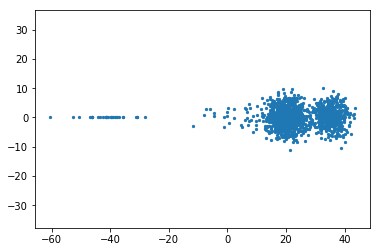

In [17]:
np.random.seed(1234)
data = np.concatenate([np.random.multivariate_normal([20,0],np.array([[10,0],[0,10]]),1000),
                       np.random.multivariate_normal([35,0],np.array([[10,0],[0,10]]),500)])


data = np.concatenate([data,
                       np.random.multivariate_normal([8,0],[[80,0],[0,5]],50),
                       np.random.multivariate_normal([-40,0],np.array([[40,0],[0,0]]),30)])

plt.scatter(data[:,0],data[:,1], s=5)
plt.axis('equal')
plt.show()

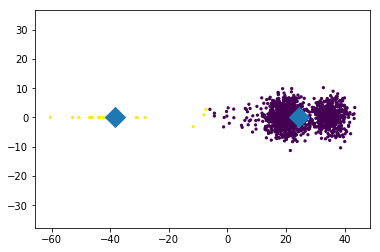

In [18]:
from sklearn.preprocessing import StandardScaler

km = KMeans(2)
km.fit(data)

col = np.array(["red","green","blue"])
plt.scatter(data[:,0],data[:,1],c = km.labels_, s=5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,marker="D")
plt.axis('equal')
plt.show()

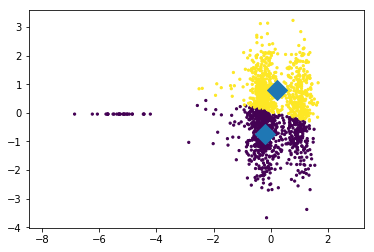

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_sc = sc.fit_transform(data)

km = KMeans(2)
km.fit(data_sc)

plt.scatter(data_sc[:,0],data_sc[:,1],c = km.labels_, s=5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,marker="D")
plt.axis('equal')
plt.show()

## Zadanie. Implementacja algorytmów k-medoidów

1. Algorytm w zupełności analogiczny do K-średnich. Różnica:
    - Środek klastra to punkt ze zbioru, który minimalizuje sumę odległości do pozostałych punktów z klastra
    - Miara jakości (zamiast inercji) - suma sum odległości punktów w klastrach do ich środków 
    
   Specyfikacja. 
   
   Wywołanie:
   
    kmed = KMedoids(n_clusters=k)
    
    kmed.fit(data1)
    
    kmed.predict(data2)
    
   ma dawać rezultat zgodny z konwencją sklearna.
   
   Definiujemy w obiekcie tylko niezbędne. "fit" oraz "predict" maja być jedynymi publicznymi metodami.
   
2. Przeprowadzić testy implementacji

3. Zaproponowac modyfikację jeszcze bardziej uodparniającą algorytm na obserwacje odstające 

4. Uogólnić klasę na k-centroidow - stworzyć nową analogiczną klasę, w której definicję środka oraz odległości przekazujemy jako argument podczas inicjowania obiektu.

5. Dodać algorytm K_Medoidów do analizy porównawczej algorytmów

In [32]:
from sklearn.metrics import pairwise_distances
import numpy as np



class KMedoids(object):
    
    def __init__(self, n_clusters):
        
        self.n_clusters = n_clusters
        self.cluster_centers = None
        self.labels = None
        self.tol = 1e-4
        self.sum_of_distances = 0        
        
    def _calculate_centers(self, X):
        
        centers = []
        for cluster in range(self.n_clusters):
            x_c = X[self.labels==cluster]
            d = pairwise_distances(x_c)
            medoid_c = x_c[np.argmin(d.sum(axis=1))]
            centers.append(medoid_c)
            
        self.cluster_centers = np.array(centers)
 
        
    def _assign_labels(self, X):
        
        self.labels = np.argmin(pairwise_distances(X,self.cluster_centers),axis=1)
        
        
        
    def _calculate_sum_of_distances(self,X):
        
        sum_of_distances = 0
        for cluster in range(self.n_clusters):
            sum_of_distances += np.sum(pairwise_distances(X[self.labels==cluster],self.cluster_centers[cluster].reshape((1,-1))))
        self.sum_of_distances = sum_of_distances

            
            
    def fit(self, X):
        
        if self.cluster_centers is None or self.labels is None:
            
            self.cluster_centers = X[np.random.choice(range(len(X)),self.n_clusters,False)]
            self._assign_labels(X)
            self._calculate_sum_of_distances(X)
            
       
        crit = 2*self.sum_of_distances
        while (crit - self.sum_of_distances)/crit > self.tol:
            crit = self.sum_of_distances
            self._calculate_centers(X)
            self._assign_labels(X)
            self._calculate_sum_of_distances(X)
            print(crit)
            
                 
        
    def predict(self, X):
        
        return(np.argmin(pairwise_distances(X,self.centers),axis=1))
        

In [33]:
kmed = KMedoids(2)

In [34]:
kmed.fit(data)

11394.664974
8298.77811784
8296.8118383


In [35]:
kmed.cluster_centers

array([[ 34.82541096,   0.48508842],
       [ 19.56741675,   0.0578355 ]])

In [36]:
from sklearn.cluster import KMeans
km = KMeans(2)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

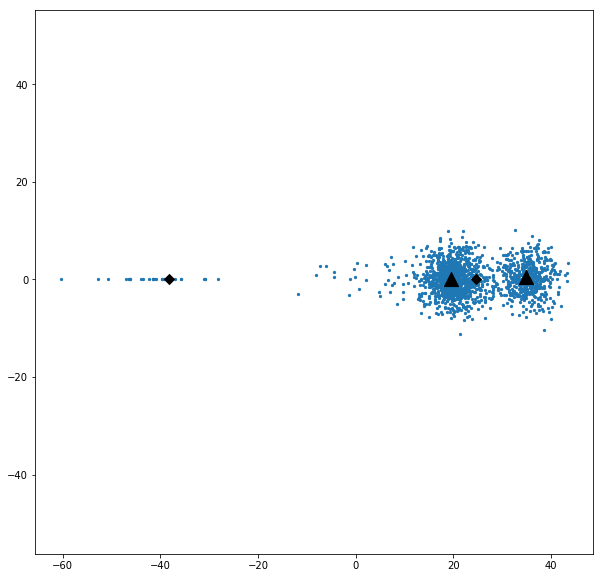

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],s=5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c="black",s=50,marker="D")
plt.scatter(kmed.cluster_centers[:,0],kmed.cluster_centers[:,1],c="black",s=200,marker="^")
plt.axis('equal')
plt.show()

# Case study - grupowanie tekstów - abstraktów artykułów

https://archive.ics.uci.edu/ml/datasets/NSF+Research+Award+Abstracts+1990-2003 z folderu Data Folder ściągamy plik Part1. Jest to plik zawierający podstawowe informacje i abstrakty pewnego zbioru artykułów naukowych. Zadanie: pogrupować artykuły na podstawie abstraktów.

Uwaga: w porównywaniu dokumentów często dobrze sprawdza się metryka cosinusowa

$cosine\_dist(u,v) = 1- \frac{u \cdot v}{||u|| * ||v||}$